In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-11-14 13:55:27--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-11-14 13:55:35 (16.4 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
!unzip fruits.zip


Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:


img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


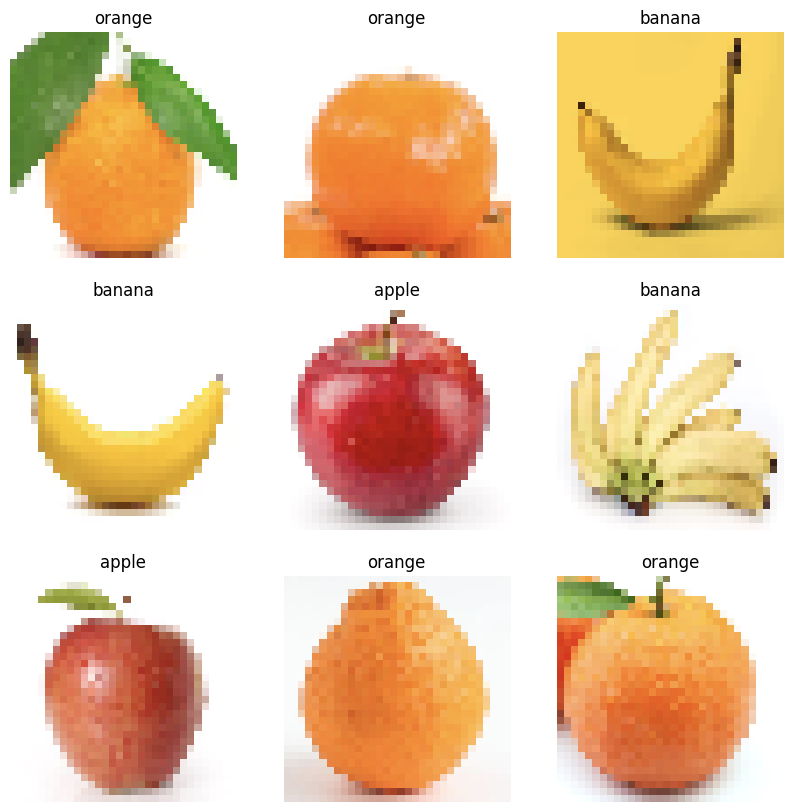

In [ ]:


class_names = ['apple', 'banana', 'orange']
plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128,3,activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='softmax'),
        tf.keras.layers.Dense(3)
    ]
)

In [ ]:
model.compile(
    optimizer = 'rmsprop',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.3599 - loss: 1.0982 - val_accuracy: 0.3333 - val_loss: 1.1026
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4354 - loss: 1.0710 - val_accuracy: 0.5606 - val_loss: 1.0441
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.4957 - loss: 1.0430 - val_accuracy: 0.5758 - val_loss: 0.9893
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6256 - loss: 0.9844 - val_accuracy: 0.4091 - val_loss: 1.0556
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.6121 - loss: 0.9737 - val_accuracy: 0.7576 - val_loss: 0.9362
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.6900 - loss: 0.9445 - val_accuracy: 0.8636 - val_loss: 0.8962
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7658 - loss: 0.9155 - val_accuracy: 0.7424 - val_loss: 0.9067
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - accuracy: 0.8171 - loss: 0.8868 - val_accuracy: 0.7727

In [ ]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step - accuracy: 0.7891 - loss: 0.7329


[0.7344782948493958, 0.7923076748847961]

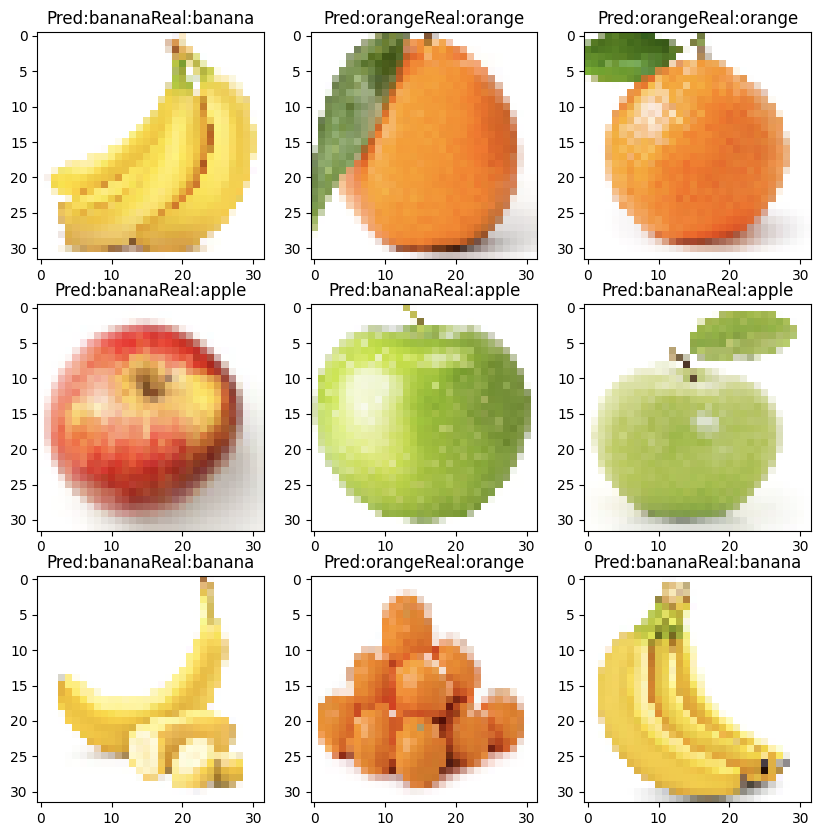

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images,labels in test_ds.take(1):
  classifications = model(images)

  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    index = numpy.argmax(classifications[i])
    plt.title("Pred:"+class_names[index]+"Real:"+class_names[labels[i]])
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite","wb") as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp8dtqrmcq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  140210422497552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422500432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210420105040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422501584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422501200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422502160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422501008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422503120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422502544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140210422504080: TensorSpec(shape=(), dtype=tf.resource, name=None)
